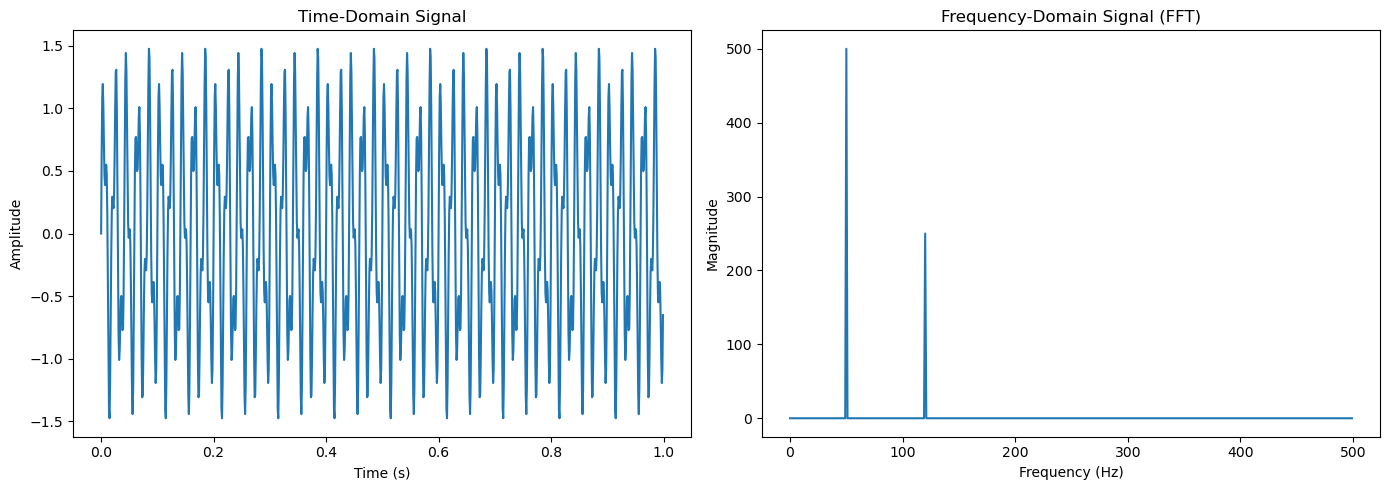

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic time-domain signal
# Let's create a time-domain signal with two different frequencies
sampling_rate = 1000  # Sampling rate in Hz
t = np.linspace(0, 1, sampling_rate, endpoint=False)  # 1 second of data

# Create a signal with two different frequencies
freq1 = 50  # Frequency of the first sine wave in Hz
freq2 = 120  # Frequency of the second sine wave in Hz
amplitude1 = 1.0
amplitude2 = 0.5

signal = amplitude1 * np.sin(2 * np.pi * freq1 * t) + amplitude2 * np.sin(2 * np.pi * freq2 * t)

# Convert the signal to a PyTorch tensor
signal_tensor = torch.tensor(signal, dtype=torch.float32)

# Step 2: Apply the FFT using PyTorch
fft_result = torch.fft.fft(signal_tensor)

# Step 3: Compute the frequency spectrum
# Since the FFT output is symmetric, we only need to take the first half
num_samples = len(signal_tensor)
freqs = np.fft.fftfreq(num_samples, 1 / sampling_rate)
half_n = num_samples // 2

# Get the magnitude of the FFT (absolute value of the complex numbers)
magnitude = torch.abs(fft_result[:half_n])
frequencies = freqs[:half_n]

# Step 4: Plot the time-domain and frequency-domain representations
plt.figure(figsize=(14, 5))

# Time-domain plot
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Frequency-domain plot
plt.subplot(1, 2, 2)
plt.plot(frequencies, magnitude.numpy())
plt.title('Frequency-Domain Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
